## SVM
Imagine you have identified a decision boundary, is it the best out all?\

As you can see in the Fig1, they both do the job of separating the points into 2 labels

SMV suggests to take the boundary that is the maximized distance between nearest data points

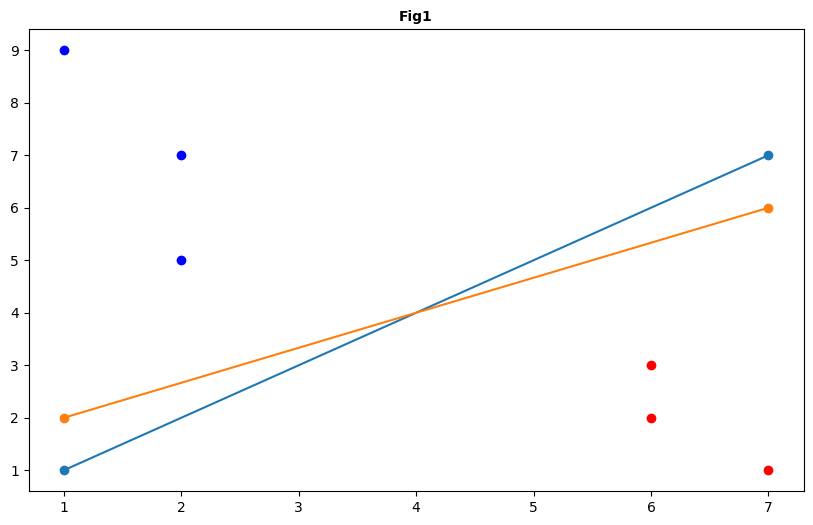

In [7]:
import numpy as np
import matplotlib.pyplot as plt

points1 = [[1,9],[2,7],[2,5]]
points2 = [[6,2],[6,3],[7,1]]


plt.figure(figsize=(10, 6))
for arr in points1:
    x, y = arr
    plt.scatter(x, y, color='blue')
for arr in points2:
    x, y = arr
    plt.scatter(x, y, color='red')

x1,y1 = [1,1],[7,7]
x2,y2 = [1,2],[7,6]       
plt.plot((x1, y1), (x2, y2), marker = 'o')
plt.title('Fig1', fontsize=10, fontweight='bold')
plt.show() 

Take a look in the Fig2, the 2 dashed lines passes through the closest data point from the decision boundary, the distance between the dashed line and decision boundary is called margin

### Maximal Margin Classifier

As the name suggests, it tries to get the max margin possible

But this approach is very sensitive to the outliers, like what if we have a point on the decision boundary

Now the margin of red side is near 0, so leaving a huge space for the blue side, and this is not proportional

### Support Vectors

To fix this we use the Soft Margin classifiers also known as Support vector classifiers

We allow some misclassification within the margin, the data that are on the line and inside the margin are called support vectors

To find the best margin and considering the misclassification, we try the model with cross validation or just simply use the L1 regularization allowing the penalty for the outliers

A smaller $\lambda$ will lead to a smaller margin, and viceversa

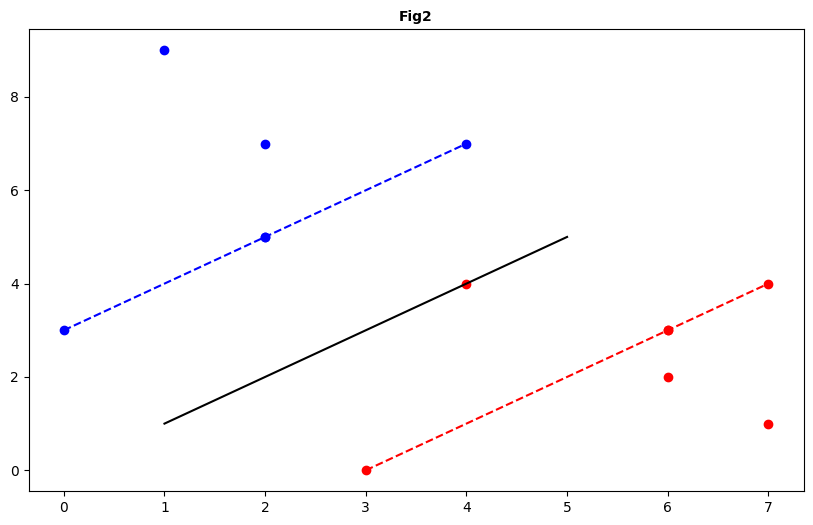

In [27]:
import matplotlib.pyplot as plt

points1 = [[1,9],[2,7],[2,5]]
points2 = [[6,2],[6,3],[7,1],[4,4]]

plt.figure(figsize=(10, 6))
for arr in points1:
    x, y = arr
    plt.scatter(x, y, color='blue')
for arr in points2:
    x, y = arr
    plt.scatter(x, y, color='red')

a = [0,2,4]
b = [3,5,7]

aa = [3,6,7]
bb = [0,3,4]

centera = []
centerb = []

for x1,x2 in zip(a,aa):
    centera.append((x1+x2) // 2)
for y1,y2 in zip(b,bb):
    centerb.append((y1+y2) // 2)

plt.plot(a, b, 'o--b') 
plt.plot(aa, bb, 'o--r')
plt.plot(centera,centerb, color = 'black') 
plt.title('Fig2', fontsize=10, fontweight='bold')
plt.show() 

Given these lines how do we know the distance (margin)?

Suppose the decision boundary is $w^{T}x+b = 0$

then the 2 lines would be $w^{T}x+b = 1$ and $w^{T}x+b = -1$ since they are parallel to the decision boundary

Suppose we fix a point on the $w^{T}x+b = -1$ calling it $x_{1}$, we want to find the distance between $x_{1}$ and the perpendicular projection of $x_{1}$ on the $w^{T}x+b = 1$ calling it $x_{2}$

So given 2 hyperplanes, $w$ would be the normal direction to both heperplanes, and to reach from hyperplane 1 to 2, the shortest distance would be following this normal $w$

We can state that the distance is $d = \lambda\ *\ w$

Thus we can write $x_{2} = x_{1} + d$

Now we do the substitution $w^{T}x+b = 1$ becomes $w^{T}(x_{1} + d)+b = 1$

$(w^{T}x_{1} * w^{T}d) + b = 1$ From previous we can recall $(w^{T}x_{1}) + b = -1$ then it becomes $-1 + w^{T}d = 1$

Now we get $w^{T}d = 2$ moving $w$ to left: $$\lambda = \frac{2}{w^{T}}

We can compose the $w^{T}$ as $\sqrt{w^{T}w}$

so the final formula for the distance would be:
$$
d = \frac{2}{\sqrt{w^{T}w}}
$$

To maximize the distance, we need to minimize the $\sqrt{w^{T}w}$, for mathematical convenience this is equivalent to minimize the:
$$
min\frac{w^{T}w}{2}
$$

And if we introduce the penalty $\lambda$, it will be the soft margin extension:
$$
min\frac{w^{T}w}{2} + \lambda\sum_{}^{}\epsilon_{i}
$$
subject to: $y_{i}(w^{T}x^{i} + b) >= 1 - \epsilon_{i}$ 

### Kernels

SVM with kernels can compute non linear decision boundaries
